### import libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Cargar dataset
df = pd.read_csv('ecommerce_sales_synthetic.csv', parse_dates = ["order_date"])

In [ ]:
# 2. dimensions and columns
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"\nColumns: {df.columns.tolist()}")

# 3. first and last rows
print(df.head(3))

print(df.tail(3))

# 4. general information
print(df.info())

# 5. descriptive statistics
print(df.describe())

# 6. MISSING VALUES
print(df.isna().sum())
print(f"\nTotal missing values: {df.isna().sum().sum()}")

# 7. DUPLICATES
print(f"Duplicate rows: {df.duplicated().sum()}")

# 8. DATA TYPES
print(df.dtypes)

In [70]:
# Eliminar duplicados 
df = df.drop_duplicates()

# Cambiar valores nulos en marketing channel
df['marketing_channel'] = df['marketing_channel'].fillna('Unknown')

# Cambiar valores de edad por la mediana
df['customer_age'] = df['customer_age'].fillna(df['customer_age'].median()).astype(int)

# Convertir is_returned a valores bool
df['is_returned'] = df['is_returned'].astype(bool)


In [ ]:
# Crear columna de año
df['year'] = df['order_date'].dt.year

# Crear columna de mes 
df['month'] = df['order_date'].dt.month

# Crear columna de dia
df['day'] = df['order_date'].dt.day

# Crear columna weekday
df['weekday'] = df['order_date'].dt.day_name()
         
# Crear columna week
df['week'] = df['order_date'].dt.isocalendar().week

# Agrupar ventas diarias
''' se crea un dataframe donde se agrupan las ventas por dia '''
daily_sales = df.groupby('order_date')['subtotal'].sum().reset_index()

''' renombramos la columna subtotal '''
daily_sales = daily_sales.rename(columns = {'subtotal' : 'daily_revenue'})

# Calcular la media movil de 7 dias
daily_sales['ma_7'] = daily_sales['daily_revenue'].rolling(window = 7).mean()


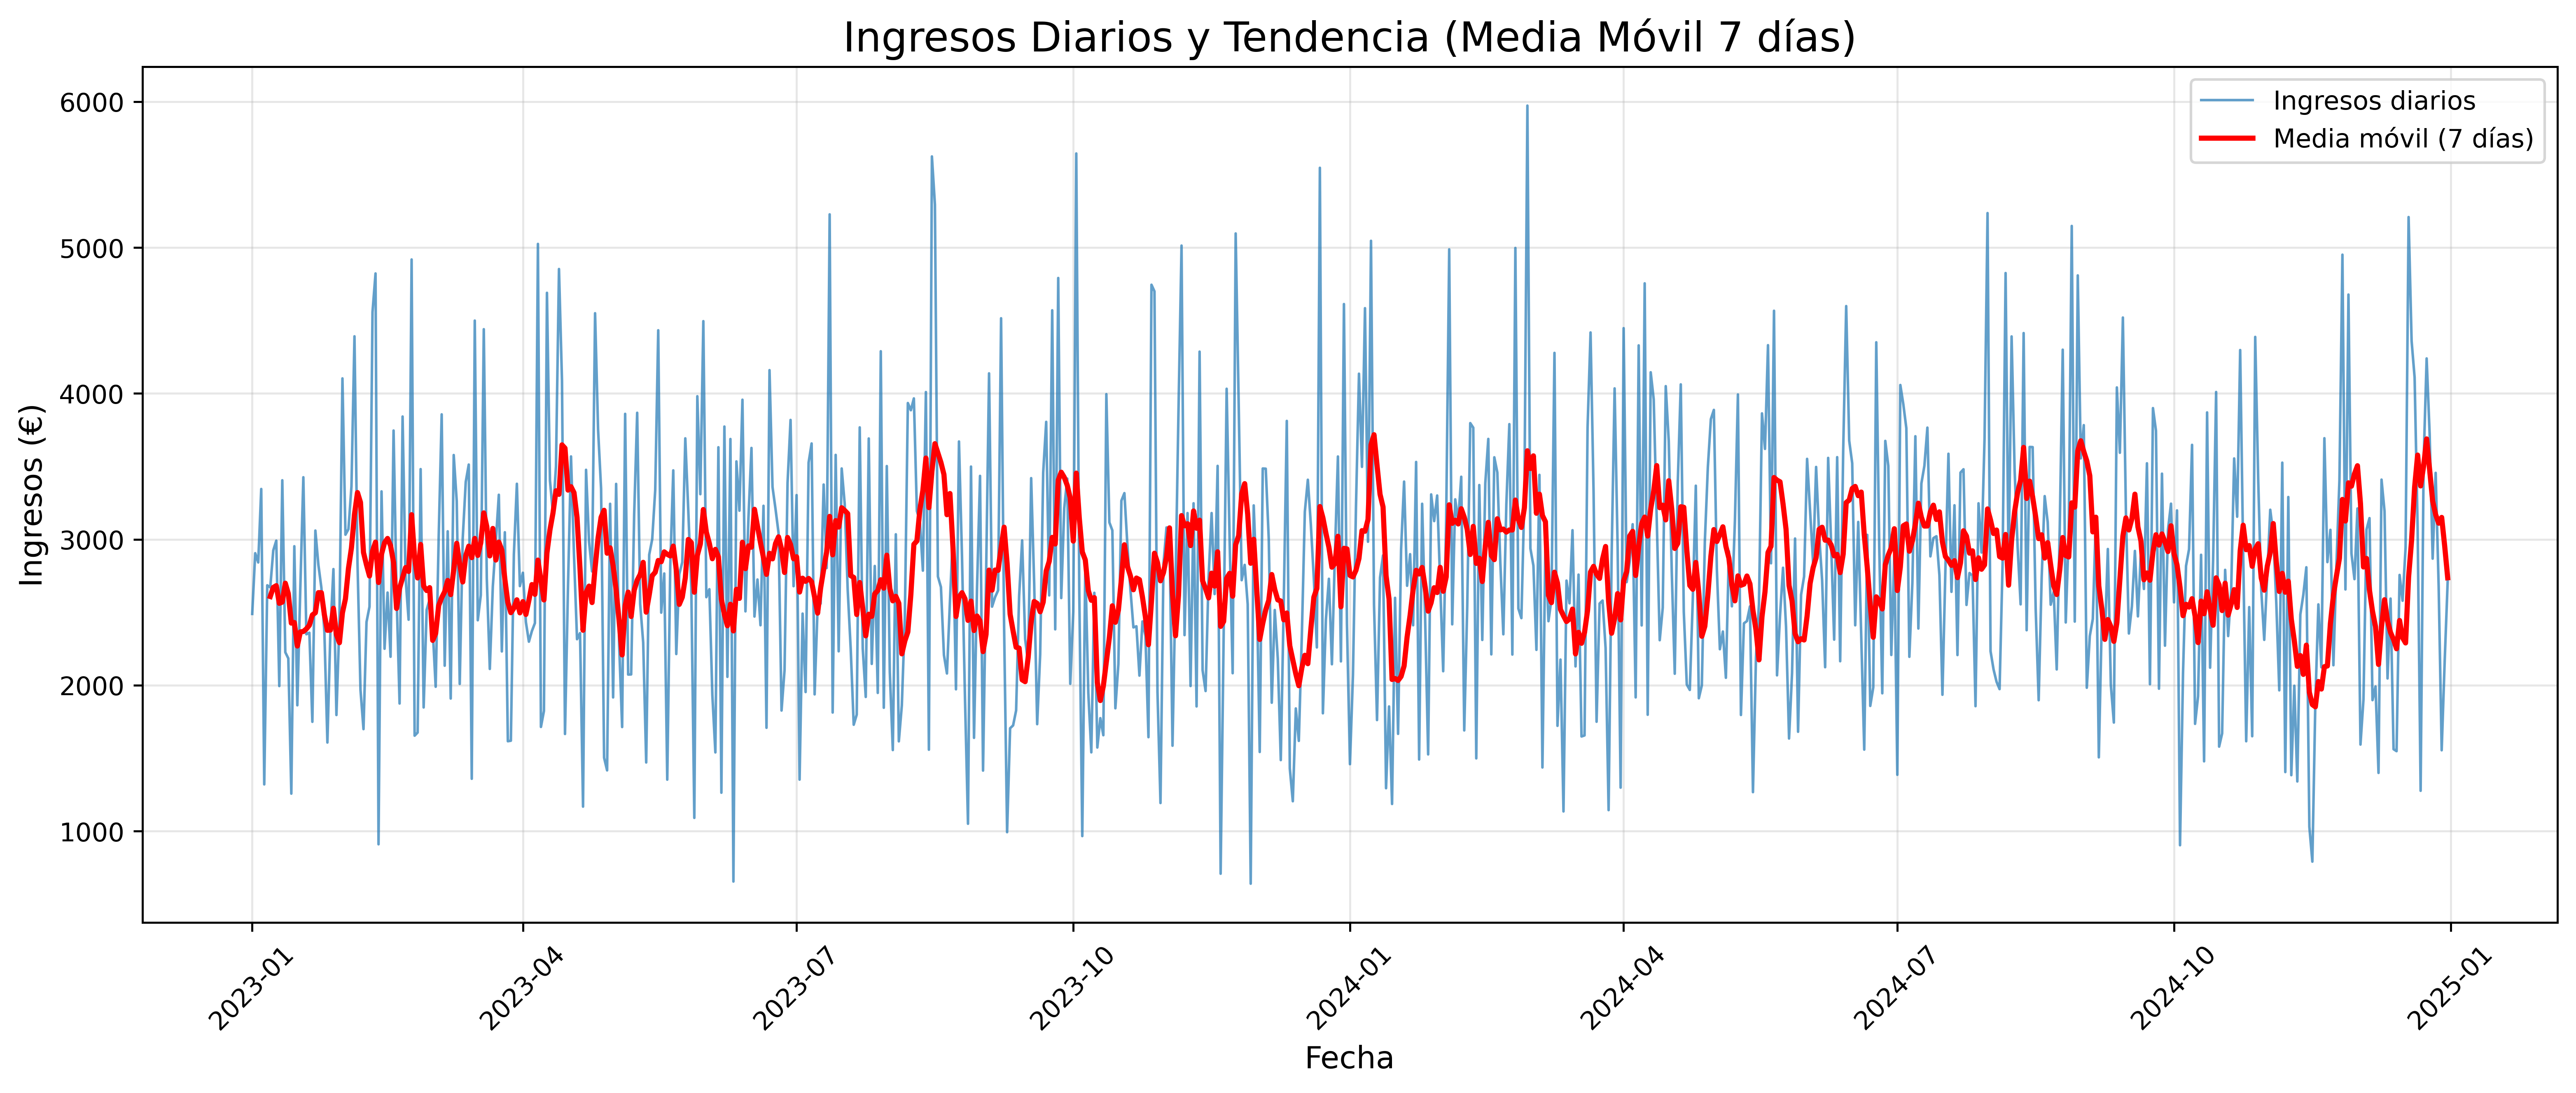

In [73]:
# Crear la gráfica
plt.figure(figsize=(14, 6), dpi = 450)

# Línea de ingresos diarios
plt.plot(daily_sales['order_date'], 
         daily_sales['daily_revenue'], 
         label='Ingresos diarios', 
         linewidth=1, 
         alpha=0.7)

# Línea de media móvil
plt.plot(daily_sales['order_date'], 
         daily_sales['moving_avg_7d'], 
         label='Media móvil (7 días)', 
         color='red', 
         linewidth=2)

# Personalización
plt.title('Ingresos Diarios y Tendencia (Media Móvil 7 días)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ingresos (€)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar
plt.show()